<a href="https://colab.research.google.com/github/rishabh93851-collab/Laplace-Equation-for-Incompressible-Irrotational-Fluid-Flow/blob/main/Laplace_Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Grid size
nx, ny = 50, 50
phi = np.zeros((ny, nx))

In [3]:

# Boundary conditions
phi[:, 0] = 1.0     # Left wall (inlet)
phi[:, -1] = 0.0    # Right wall (outlet)

In [7]:
# Iteration parameters
max_iter = 5000
tolerance = 1e-5

for it in range(max_iter):
    phi_old = phi.copy()

    for i in range(1, ny-1):
        for j in range(1, nx-1):
            phi[i, j] = 0.25 * (
                phi[i+1, j] +
                phi[i-1, j] +
                phi[i, j+1] +
                phi[i, j-1]
            )

    # Neumann BC (top & bottom walls)
    phi[0, :] = phi[1, :]
    phi[-1, :] = phi[-2, :]
    error = np.max(np.abs(phi - phi_old))

    if error < tolerance:
        print(f"Converged after {it} iterations")
        break



Converged after 2134 iterations


In [8]:
# Compute velocity components
u = np.gradient(phi, axis=1)  # x-velocity
v = np.gradient(phi, axis=0)  # y-velocity


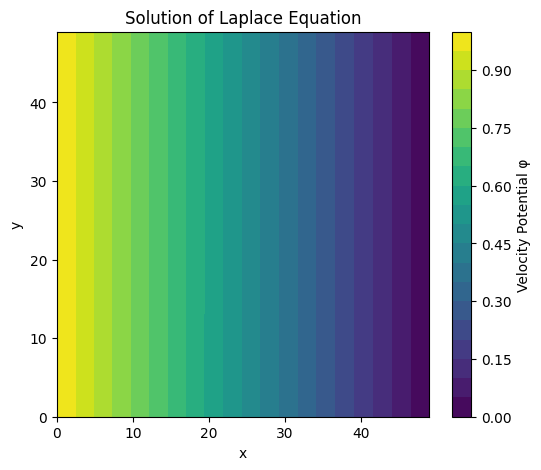

In [9]:
# Plot potential
plt.figure(figsize=(6,5))
plt.contourf(phi, 20, cmap='viridis')
plt.colorbar(label='Velocity Potential φ')
plt.title('Solution of Laplace Equation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


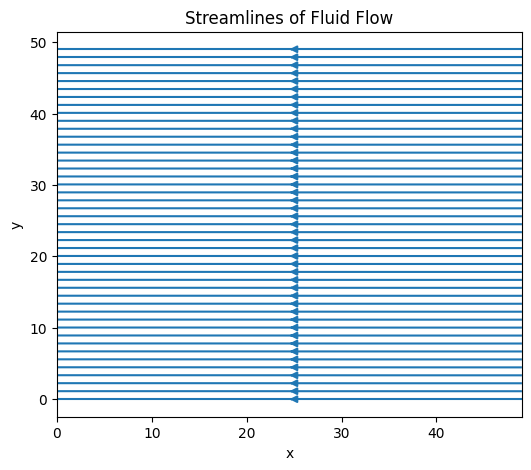

In [10]:

# Plot streamlines
x, y = np.meshgrid(np.arange(nx), np.arange(ny))
plt.figure(figsize=(6,5))
plt.streamplot(x, y, u, v, density=1.5)
plt.title('Streamlines of Fluid Flow')
plt.xlabel('x')
plt.ylabel('y')
plt.show()